In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [4]:
data = datasets.load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
x = data.data
y = data.target
df = pd.DataFrame(x,y)
df['wine class'] = data.target
df['wine class'] = df['wine class'].replace(to_replace=[0,1,2],value=['class_0','class_1','class2'])
df


0     1     2     3      4     5     6     7     8      9    10    11  \
0   14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04  3.92   
0   13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
0   13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
0   14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
0   13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
..    ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   ...   
2   13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
2   13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
2   13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
2   13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
2   14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

        12 wine class  
0   1065.0    class_0  
0   1050.0    class_0  
0   1185.0    class_0  
0   1480.0    class_0  
0    735.0    class_0  
..     ...        ...  
2    740.0     class2  
2    750.0     class2  
2    835.0     class2  
2    840.0     class2  
2    560.0     class2  

[178 rows x 14 columns]

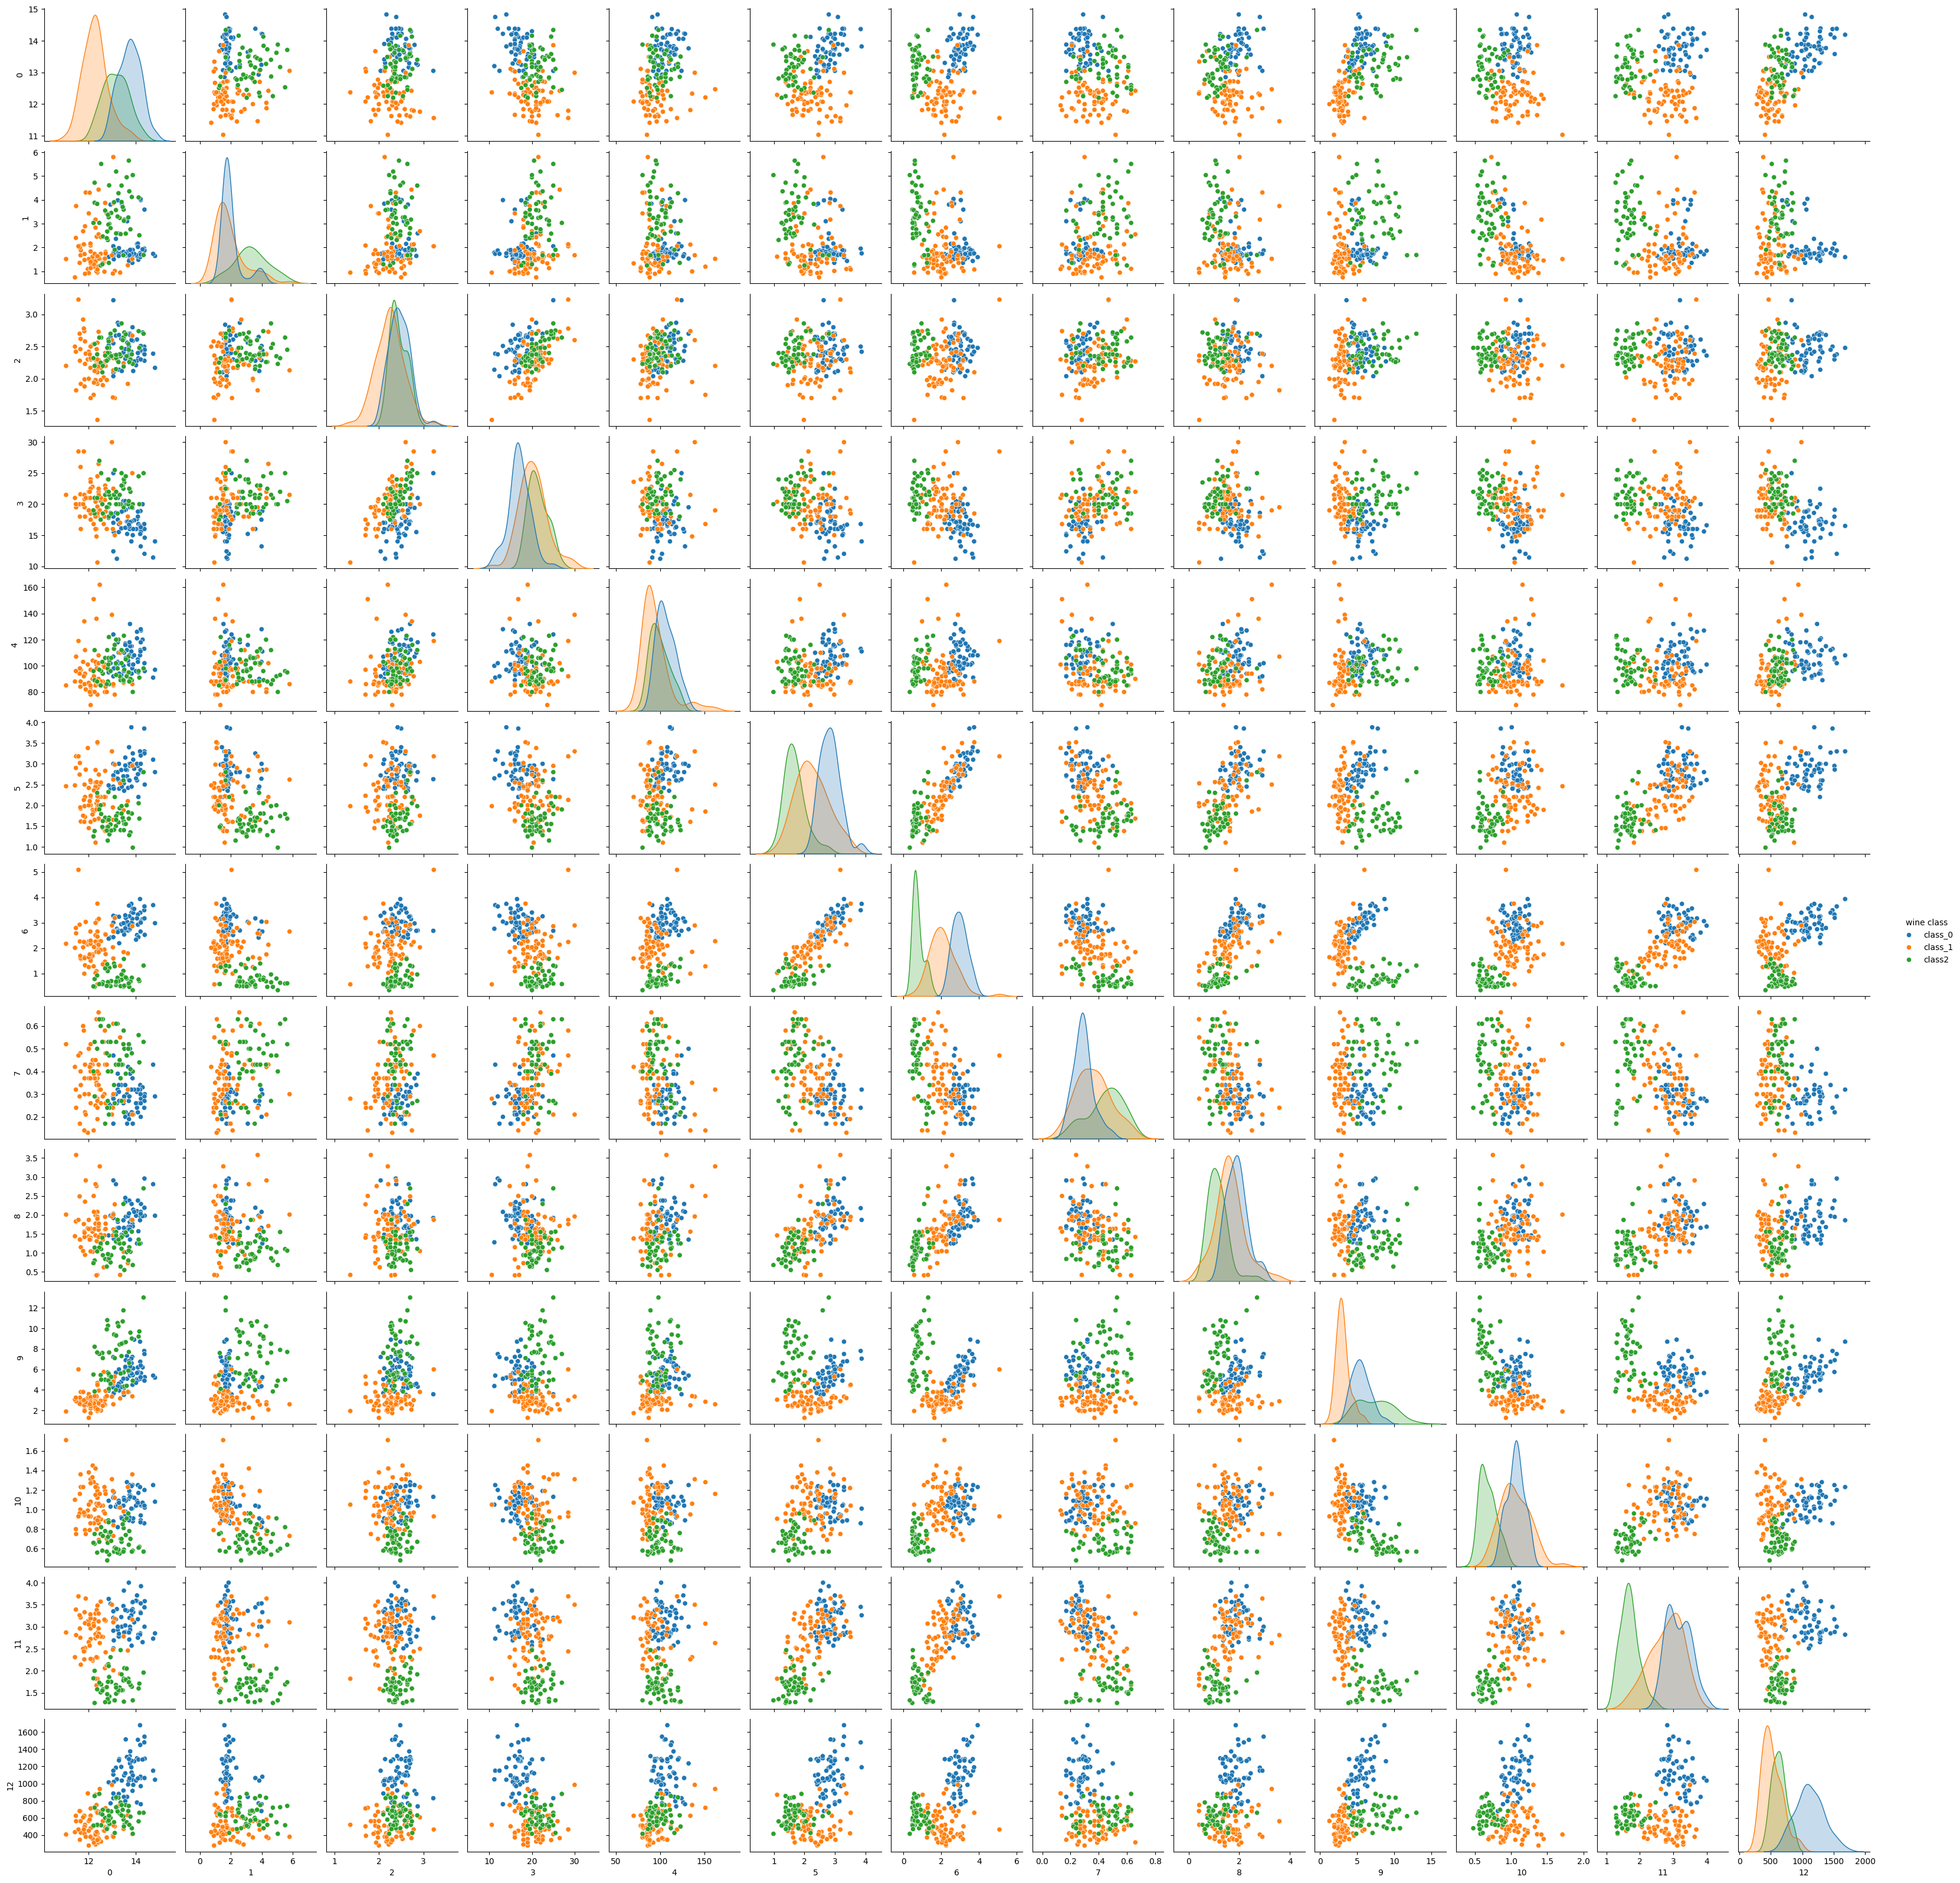

In [10]:
sns.pairplot(data=df,hue='wine class')

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)


In [13]:
#to know the k value we are going to math to find the sqrt of the len of the ytest
import math
math.sqrt(len(ytest))

7.3484692283495345

In [18]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)
accuracy = accuracy_score(ytest,prediction)
print(prediction)
print(accuracy)


[1 1 2 2 0 1 2 0 2 1 0 2 1 0 2 1 1 1 1 0 0 1 2 0 2 1 0 0 0 2 1 2 1 0 2 1 1
 2 1 0 0 2 2 2 0 0 2 0 0 0 1 2 1 0]
0.6481481481481481


In [19]:
#now we are using the standard scaler to get standardized value
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [20]:
scalermodel = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
scalermodel.fit(xtrain,ytrain)
prediction = scalermodel.predict(xtest)
accuracy = accuracy_score(ytest,prediction)
print(prediction)
print(accuracy)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0 0 1 0 0 0 1 2 2 0]
0.9814814814814815
